Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

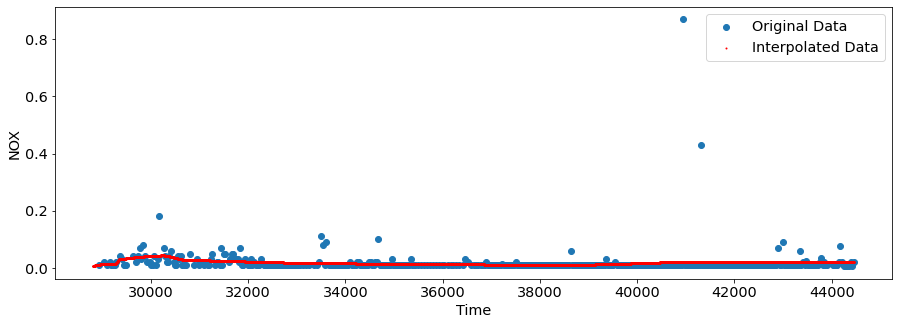

313/313 [==============================] - 0s 375us/step - loss: 5.0758e-19
['loss']


In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/Interpolation//NOX/saved_model/my_modelBB38_NOX')
# Check its architecture
model.summary()

df = pd.read_csv("E:/1 My Project/Interpolated data/NOX_data/BB38.csv")
time = df['time'].values
NOX = df['NOX'].values
df

#Transform the normalized scale to real scale
NOX_min = 0.005
NOX_max = 0.87
time_min = 28934.49                     
time_max = 44454.35                         

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(NOX_max - NOX_min) + NOX_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, NOX*(NOX_max - NOX_min) + NOX_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('NOX')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [2]:
interpolation = model.predict([0.421041612
,0.424843193
,0.42877364
,0.432704087
,0.436634535
,0.440564982
,0.444559863
,0.448361443
,0.452291891
,0.456222338
,0.460152785
,0.464083233
,0.468078114
,0.471879694
,0.475810141
,0.479740589
,0.483671036
,0.487601483
,0.491596364
,0.495462378
,0.503323273
,0.966149559
,0.968082566
,0.970080006
])
interpolation

array([[0.00892805],
       [0.00888323],
       [0.0088369 ],
       [0.00879057],
       [0.00874423],
       [0.0086979 ],
       [0.00865081],
       [0.00860599],
       [0.00855966],
       [0.00851332],
       [0.00846699],
       [0.00842066],
       [0.00837356],
       [0.00832875],
       [0.00828242],
       [0.00823609],
       [0.00818975],
       [0.00814341],
       [0.00809632],
       [0.00805075],
       [0.00795808],
       [0.017017  ],
       [0.01700618],
       [0.01699501]], dtype=float32)